In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/car_price/car_price_prediction.csv')

Датасет можно найти [тут](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)

Всего 18 колонок:
- ID
- Price - цена автомобиля (Целевая колонка)
- Levy - размер налога
- Manufacturer - производитель, марка
- Model - модель
- Prod. year - год производства
- Category - тип автомобиля
- Leather interior - наличие кожанного салона
- Fuel type - тип топлива
- Engine volume - объем двигателя
- Mileage - пробег
- Cylinders - количество цилиндров
- Gear box type - тип коробки передач
- Drive wheels - ведущие колеса
- Doors - количество дверей
- Wheel - леворульная/праворульная машина
- Color - цвет
- Airbags - количество подушек безопасности

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 18)

In [5]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('*'*75)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
***************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
***************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798'

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# Преобразование данных

В некоторых местах в колонке Levy есть пропущенные значения, но они не помечены как NaN. Заменим пропуски ('-') на 0

In [7]:
df.loc[df['Levy'] == '-', 'Levy'] = '0'
df['Levy'] = pd.to_numeric(df['Levy'])

In [8]:
df['Leather interior'].replace(['Yes', 'No'], [True, False], inplace=True)

В некоторых местах колонки Engine volume имеется приписка Turbo. Разделим эту колонку на две

In [9]:
df['Engine volume'] = df['Engine volume'].str.lower()
df['Turbo'] = df['Engine volume'].str.contains('turbo')
df['Engine volume'] = df['Engine volume'].str[:3]
df['Engine volume'] = pd.to_numeric(df['Engine volume'])

In [10]:
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [11]:
df['Doors'].replace(['04-May', '02-Mar', '>5'], [4, 2, 5], inplace=True)

В данном датасете имеются машины со стоимостью меньше 1000, что говорит о необходимости чистки данных. То же касается пробега и значений налогов. Избавимся от выбросов

In [12]:
def detect_outliers(df, features, thold):
  outliers_indices = []

  for feature in features:
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3 - Q1

    outlier_step = IQR * thold

    outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index

    outliers_indices.extend(outlier_list_col)

    return outliers_indices

In [13]:
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(df, features, 1.5)

df.drop(df.loc[outliers].index, inplace=True)

In [14]:
df.shape

(18164, 19)

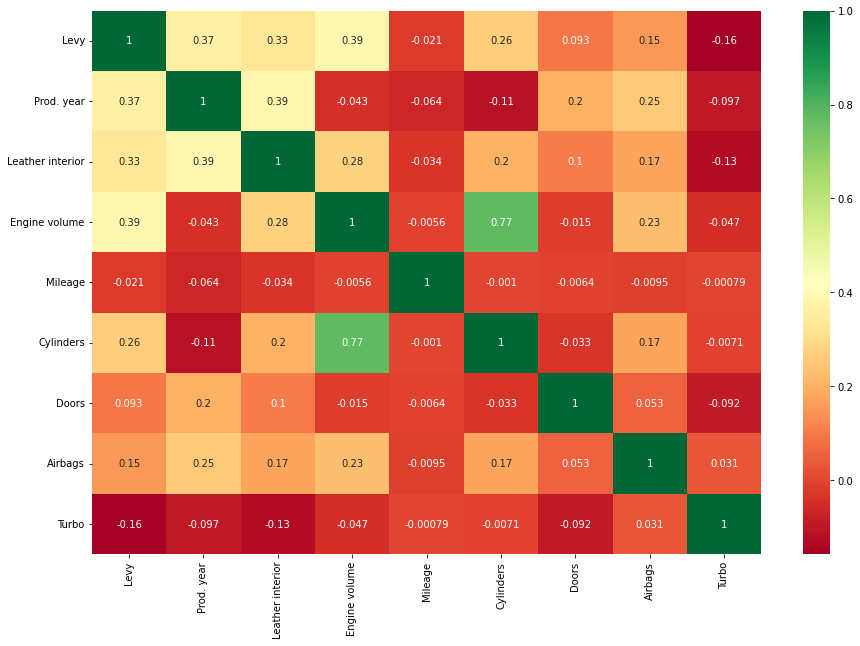

In [15]:
sns.heatmap(df.drop(['ID', 'Price'], axis=1).corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 10)

Количество цилиндров сильно коррелирует с объемом двигателя, что не удивительно

In [16]:
num_attrs = ['Levy', 'Prod. year', 'Engine volume', 'Doors', 'Mileage', 'Cylinders', 'Airbags']
cat_attrs = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 
             'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

num_df = df[num_attrs]
cat_df = df[cat_attrs]

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attrs),
    ('cat', OneHotEncoder(), cat_attrs)
])

prices = df['Price']

df = pipeline.fit_transform(df)

# Подготовка тренировочных и тестовых данных

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, prices, test_size=0.3, random_state=123)

# Настройка и обучение моделей

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error

models_r2_score = dict()
models_rmse = dict()
model_fit_time = dict()
model_predict_time = dict()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

In [20]:
def add_statistics(name, r2, rmse, fit_time, predict_time):
  models_r2_score[name] = r2
  models_rmse[name] = rmse
  model_fit_time[name] = fit_time
  model_predict_time[name] = predict_time

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

max_depth = [2, 4, 8, 20, 50]
criterion = ['squared_error', 'friedman_mse', 'absolute_error']

decision_tree = DecisionTreeRegressor(random_state=28)

grid_dt = GridSearchCV(estimator=decision_tree, cv=cv, 
        param_grid=dict(max_depth=max_depth, criterion=criterion))

grid_dt.fit(X_train, y_train)
print("best param: ", grid_dt.best_params_)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best param:  {'criterion': 'squared_error', 'max_depth': 8}


Подбор гиперпараметров будет проводиться только для DecisionTreeRegressor, так как для других моделей нехватает оперативной памяти и вычислительной мощности.

In [22]:
import time

In [23]:
decision_tree = DecisionTreeRegressor(random_state=28, max_depth=8, criterion='squared_error')

t1 = time.time()
decision_tree.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = decision_tree.predict(X_test)
t4 = time.time()
add_statistics('DecisionTree', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [24]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=24, n_estimators=100)
t1 = time.time()
random_forest.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = random_forest.predict(X_test)
t4 = time.time()
add_statistics('RandomForest', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [25]:
from sklearn.ensemble import BaggingRegressor

bagging_dt = BaggingRegressor(DecisionTreeRegressor(), random_state=10) 
t1 = time.time()
bagging_dt.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = bagging_dt.predict(X_test)
t4 = time.time()
add_statistics('Bagging', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [26]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_dt = AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=10)
t1 = time.time()
adaboost_dt.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = adaboost_dt.predict(X_test)
t4 = time.time()
add_statistics('AdaBoost', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_dt = GradientBoostingRegressor(random_state=10, max_depth=50)
t1 = time.time()
gbr_dt.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = gbr_dt.predict(X_test)
t4 = time.time()
add_statistics('GBR', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [28]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr_dt = HistGradientBoostingRegressor(random_state=10, max_depth=50)
t1 = time.time()
hgbr_dt.fit(X_train.toarray(), y_train)
t2 = time.time()
t3 = time.time()
pred = hgbr_dt.predict(X_test.toarray())
t4 = time.time()
add_statistics('HGBR', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [29]:
import xgboost as xgb

reg = xgb.XGBRegressor()
t1 = time.time()
reg.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = reg.predict(X_test)
t4 = time.time()
add_statistics('XGBR', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [30]:
import lightgbm as lgb

reg = lgb.LGBMRegressor()
t1 = time.time()
reg.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = reg.predict(X_test)
t4 = time.time()
add_statistics('LGBMR', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [31]:
!pip install catboost;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import catboost as cb

reg = cb.CatBoostRegressor()

t1 = time.time()
reg.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = reg.predict(X_test)
t4 = time.time()

add_statistics('CatBoost', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

Learning rate set to 0.061187
0:	learn: 11066.8522801	total: 64.3ms	remaining: 1m 4s
1:	learn: 10813.0071277	total: 75.6ms	remaining: 37.7s
2:	learn: 10572.9750178	total: 84.4ms	remaining: 28s
3:	learn: 10373.9855524	total: 94.8ms	remaining: 23.6s
4:	learn: 10168.2442017	total: 99.3ms	remaining: 19.8s
5:	learn: 9992.6404149	total: 103ms	remaining: 17.1s
6:	learn: 9822.6975580	total: 108ms	remaining: 15.3s
7:	learn: 9669.2330867	total: 112ms	remaining: 13.9s
8:	learn: 9540.4962799	total: 116ms	remaining: 12.8s
9:	learn: 9414.5316511	total: 120ms	remaining: 11.9s
10:	learn: 9288.2999458	total: 124ms	remaining: 11.2s
11:	learn: 9165.0302775	total: 128ms	remaining: 10.6s
12:	learn: 9054.1900138	total: 132ms	remaining: 10s
13:	learn: 8969.5640312	total: 137ms	remaining: 9.62s
14:	learn: 8875.6975114	total: 142ms	remaining: 9.31s
15:	learn: 8797.7447588	total: 147ms	remaining: 9.01s
16:	learn: 8715.4139914	total: 151ms	remaining: 8.73s
17:	learn: 8630.2190051	total: 155ms	remaining: 8.48s
18

Bagging realisation

In [33]:
import copy
from sklearn.utils import resample

class MyBagging:
  def __init__(self, estimator, n_estimators=50):
    self.estimator = estimator
    self.n_estimators = n_estimators

  def fit(self, X, y):
    self.estimators = []
    for i in range(self.n_estimators):
      e = copy.deepcopy(self.estimator)
      X_r, y_r = resample(X, y)
      e.fit(X_r, y_r)
      self.estimators.append(e)

  def predict(self, X):
    pred_lst = []

    for e in self.estimators:
      pred_lst.append(e.predict(X))

    return np.mean(pred_lst, axis=0)

  def score(self, X, y):
    return(r2_score(y, self.predict(X)))



In [34]:
reg = MyBagging(DecisionTreeRegressor(), n_estimators=8)
t1 = time.time()
reg.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = reg.predict(X_test)
t4 = time.time()

add_statistics('MyBagging', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

AdaBoost realisation

In [35]:
class MyAdaBoost:
  def __init__(self, estimator, n_estimators=50):
    self.estimator = estimator
    self.n_estimators = n_estimators

  def fit(self, X, y):
    self.estimators = []
    self.estimator_coeff = []
    sample_weight = np.full(len(y), fill_value=(1 / len(y)))

    for _ in range(self.n_estimators):
      estimator = copy.deepcopy(self.estimator)
      pred = estimator.fit(X, y, sample_weight=sample_weight).predict(X)

      # errors = np.sqrt(np.square(pred - y).sum())
      errors = np.abs(pred - y)
      max_error = np.max(errors)

      if max_error > 0:
        errors /= max_error
      
      avg_error = np.sum(errors * sample_weight)


      if avg_error == 0:
        self.estimators.append(estimator)
        self.estimator_coeff.append(1.0)
        break
      elif avg_error >= 0.5:
        if len(self.estimators) == 0:
          self.estimators.append(estimator)
          self.estimator_coeff.append(1.0)
        break


      beta = avg_error / (1 - avg_error)
      sample_weight *= np.power(beta, 1 - errors)

      sample_weight /= np.sum(sample_weight)

      self.estimators.append(estimator)
      self.estimator_coeff.append(np.log(1 / beta))

    self.estimator_coeff = np.array(self.estimator_coeff)


  def predict(self, X):
    pred_lst = []

    for e in self.estimators:
      pred_lst.append(e.predict(X))

    predictions = np.array(pred_lst).T

    prediction_indices = np.argsort(predictions, axis=1)
    sorted_weights_cumsum = np.cumsum(self.estimator_coeff[prediction_indices], axis=1)
    is_median_or_above = sorted_weights_cumsum >= (sorted_weights_cumsum[0][-1] / 2)
    median_ids = np.argmax(is_median_or_above, axis=1)
    median_ids = prediction_indices[np.arange(X.shape[0]), median_ids]

    return predictions[np.arange(X.shape[0]), median_ids]

  def score(self, X, y):
    return(r2_score(y, self.predict(X)))



In [36]:
reg = MyAdaBoost(estimator=DecisionTreeRegressor(random_state=12), n_estimators=10)
t1 = time.time()
reg.fit(X_train, y_train)
t2 = time.time()
t3 = time.time()
pred = reg.predict(X_test)
t4 = time.time()
add_statistics('MyAdaBoost', r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), t2 - t1, t4 - t3)

In [37]:
statistics = [models_r2_score, models_rmse, model_fit_time, model_predict_time]

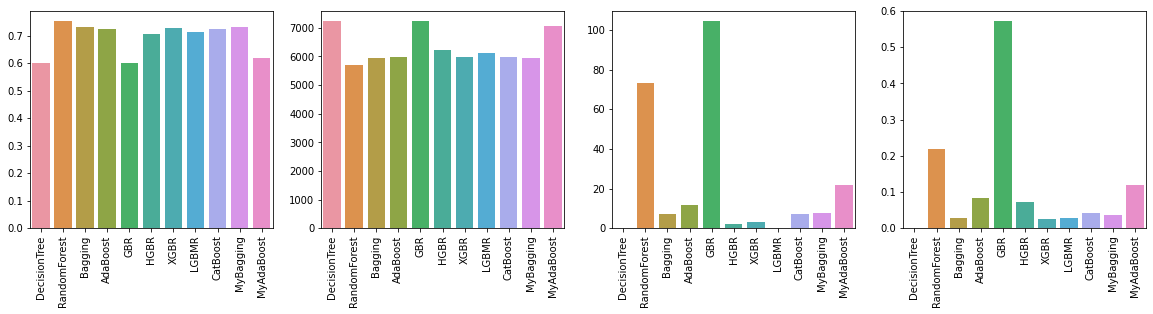

In [38]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
for ay, ax in zip(statistics, axs.flatten()):
  sns.barplot(x=list(ay.keys()), y=list(ay.values()), ax=ax)
  ax.tick_params(axis="x", rotation=90)
  ax.set_xlabel(None)


plt.show()

Слева на право представлены графики: r2_score, rmse, время обучения модели, время предсказания

В результате DesicionTreeRegressor, GradientBoostingRegressor и собственная реализация AdaBoost показали чуть менее хорошие результаты, чем остальные модели. Лучше всех показал себя RandomForest.